In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Load the dataset (remember to remove the first column in our dataset which is the id for each record)

In [3]:
data = pd.read_csv('train.csv')

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [4]:
X.shape

(61878, 93)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = None, random_state = 0)

## Use the grid-search random forest as the benchmark

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#maxfeature = [0.2, 0.4, 0.6, 0.8]
n_estimators = [50,100,500]
criterion =['gini', 'entropy']
bootstrap = [True, False]

parameters = {'criterion': criterion, 'n_estimators': n_estimators, 'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=0)
clf_standard = GridSearchCV(rf, parameters, cv=3)
clf_standard.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 500]})

In [ ]:
clf_standard.best_params_

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}

In [ ]:
base_model = RandomForestClassifier(n_jobs=-1, random_state=0, bootstrap= False, \
                                   criterion= 'gini', n_estimators= 500)

base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=500, n_jobs=-1,
                       random_state=0)

In [ ]:
base_model = RandomForestClassifier(n_jobs=-1, random_state=0, max_depth= 60, bootstrap= False, \
                                   criterion= 'gini', n_estimators= 3600, max_features ='auto',
                                   min_samples_split = 2, min_samples_leaf =1)

base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, n_estimators=3600,
                       n_jobs=-1, random_state=0)

In [ ]:
X_train.shape


(46408, 93)

## Test accuracy score and cross-entropy of our base classfifier

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, base_model.predict(X_test), normalize=True)

NameError: ignored

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(y_test, base_model.predict_proba(X_test))

0.5706768525775909

## PCA decomposition 

## Standardize our data first

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)

In [10]:
pca_test = PCA(n_components=25, svd_solver = 'auto')
pca_components = pca_test.fit_transform(X_train_standardized)

In [ ]:
#pca_df = pd.DataFrame(data = pca_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])

In [11]:
pca_test.explained_variance_ratio_

array([0.08550047, 0.06610517, 0.04174577, 0.03177826, 0.02825564,
       0.02603753, 0.02387611, 0.02368983, 0.02259794, 0.02071987,
       0.01885269, 0.01850943, 0.01839991, 0.01687529, 0.01624482,
       0.0156207 , 0.01450899, 0.01391744, 0.01354422, 0.01290698,
       0.01233748, 0.01207419, 0.01196779, 0.01115643, 0.01063917])

Text(0, 0.5, 'Proportion of Variance Explained')

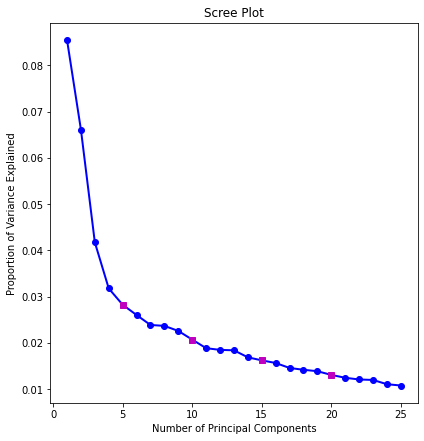

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.subplots_adjust(wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95)

PC_values = np.arange(25) + 1

ax.plot(PC_values, pca_test.explained_variance_ratio_, 'bo-', linewidth=2)

x = [5, 10, 15, 20]
y = [pca_test.explained_variance_ratio_[4], pca_test.explained_variance_ratio_[9], \
     pca_test.explained_variance_ratio_[14], pca_test.explained_variance_ratio_[19]]
ax.plot(x, y, 'ms')

ax.set_title('Scree Plot')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Proportion of Variance Explained')

# Choose 5, 10, 15, 20 principal components

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Grid search on RF with 5 components as inputs 

In [ ]:
pca_test_5 = PCA(n_components=5, svd_solver = 'auto')
pca_components_5 = pca_test_5.fit_transform(X_train_standardized)

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=0)
#clf_5 = GridSearchCV(rf, parameters, cv=3)
#clf_5.fit(pca_components_5, y_train)

In [ ]:
clf_5.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 500}

In [ ]:
clf_5_re = RandomForestClassifier(n_jobs=-1, random_state=0, bootstrap= True, \
                                   criterion= 'entropy', n_estimators= 500)

clf_5_re.fit(pca_components_5, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                       random_state=0)

## Test accuracy score and cross-entropy of our RF using 5 PCA component as its inputs

In [ ]:
accuracy_score(y_train, clf_5_re.predict(pca_components_5), normalize=True)

1.0

In [ ]:
accuracy_score(y_test, clf_5_re.predict(pca_test_5.transform(scaler.transform(X_test))), normalize=True)

0.681835811247576

In [ ]:
log_loss(y_test, clf_5_re.predict_proba(pca_test_5.transform(scaler.transform(X_test))))

0.8877541378192886

In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_5, y_train)
    y_pred = clf_5_re.predict(pca_components_5)
    accuracy_scores.append(accuracy_score(y_train, y_pred))
    precision_scores.append(precision_score(y_train, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_train, y_pred, average = None))
    recall_scores.append(recall_score(y_train, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_train, y_pred, average = None))
    f1_scores.append(f1_score(y_train, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_train, y_pred, average = None))
    names.append(name)

In [ ]:
tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,1.0,1.0,1.0,1.0


In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_5, y_train)
    y_pred = clf_5_re.predict(pca_test_5.transform(scaler.transform(X_test)))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_test, y_pred, average = None))
    recall_scores.append(recall_score(y_test, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_test, y_pred, average = None))
    f1_scores.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_test, y_pred, average = None))
    names.append(name)

tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,0.681836,0.662642,0.681836,0.660235


## Grid search on RF with 10 components as inputs

In [ ]:
pca_test_10 = PCA(n_components=10, svd_solver = 'auto')
pca_components_10 = pca_test_10.fit_transform(X_train_standardized)

#rf = RandomForestClassifier(n_jobs=-1, random_state=0)
#clf_10 = GridSearchCV(rf, parameters, cv=3)
#clf_10.fit(pca_components_10, y_train)

In [ ]:
clf_10.best_params_

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}

In [ ]:
clf_10_re = RandomForestClassifier(n_jobs=-1, random_state=0, bootstrap= False, \
                                   criterion= 'gini', n_estimators= 500)

clf_10_re.fit(pca_components_10, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=500, n_jobs=-1,
                       random_state=0)

## Test accuracy score and cross-entropy of our RF using 10 PCA component as its inputs

In [ ]:
accuracy_score(y_train, clf_10_re.predict(pca_components_10), normalize=True)

1.0

In [ ]:
accuracy_score(y_test, clf_10_re.predict(pca_test_10.transform(scaler.transform(X_test))), normalize=True)

0.751906916612799

In [ ]:
log_loss(y_test, clf_10_re.predict_proba(pca_test_10.transform(scaler.transform(X_test))))

0.6741625418999158

In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_10, y_train)
    y_pred = clf_10_re.predict(pca_components_10)
    accuracy_scores.append(accuracy_score(y_train, y_pred))
    precision_scores.append(precision_score(y_train, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_train, y_pred, average = None))
    recall_scores.append(recall_score(y_train, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_train, y_pred, average = None))
    f1_scores.append(f1_score(y_train, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_train, y_pred, average = None))
    names.append(name)

tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,1.0,1.0,1.0,1.0


In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_10, y_train)
    y_pred = clf_10_re.predict(pca_test_10.transform(scaler.transform(X_test)))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_test, y_pred, average = None))
    recall_scores.append(recall_score(y_test, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_test, y_pred, average = None))
    f1_scores.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_test, y_pred, average = None))
    names.append(name)

tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,0.751907,0.744403,0.751907,0.740057


## Grid search on RF with 15 components as inputs

In [ ]:
pca_test_15 = PCA(n_components=15, svd_solver = 'auto')
pca_components_15 = pca_test_15.fit_transform(X_train_standardized)

#rf = RandomForestClassifier(n_jobs=-1, random_state=0)
#clf_15 = GridSearchCV(rf, parameters, cv=3)
#clf_15.fit(pca_components_15, y_train)

In [ ]:
clf_15.best_params_

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}

In [ ]:
clf_15_re = RandomForestClassifier(n_jobs=-1, random_state=0, bootstrap= False, \
                                   criterion= 'gini', n_estimators= 500)

clf_15_re.fit(pca_components_15, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=500, n_jobs=-1,
                       random_state=0)

## Test accuracy score and cross-entropy of our RF using 15 PCA component as its inputs

In [ ]:
accuracy_score(y_train, clf_15_re.predict(pca_components_15), normalize=True)

1.0

In [ ]:
accuracy_score(y_test, clf_15_re.predict(pca_test_15.transform(scaler.transform(X_test))), normalize=True)

0.7709114414996768

In [ ]:
log_loss(y_test, clf_15_re.predict_proba(pca_test_15.transform(scaler.transform(X_test))))

0.6280009514867155

In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_10, y_train)
    y_pred = clf_15_re.predict(pca_components_15)
    accuracy_scores.append(accuracy_score(y_train, y_pred))
    precision_scores.append(precision_score(y_train, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_train, y_pred, average = None))
    recall_scores.append(recall_score(y_train, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_train, y_pred, average = None))
    f1_scores.append(f1_score(y_train, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_train, y_pred, average = None))
    names.append(name)

tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,1.0,1.0,1.0,1.0


In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_10, y_train)
    y_pred = clf_15_re.predict(pca_test_15.transform(scaler.transform(X_test)))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_test, y_pred, average = None))
    recall_scores.append(recall_score(y_test, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_test, y_pred, average = None))
    f1_scores.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_test, y_pred, average = None))
    names.append(name)

tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,0.771041,0.766288,0.771041,0.759949


## Grid search on RF with 20 components as inputs

In [ ]:
pca_test_20 = PCA(n_components=20, svd_solver = 'auto')
pca_components_20 = pca_test_20.fit_transform(X_train_standardized)

#rf = RandomForestClassifier(n_jobs=-1, random_state=0)
#clf_20 = GridSearchCV(rf, parameters, cv=3)
#clf_20.fit(pca_components_20, y_train)

In [ ]:
pca_components_20.shape

(46408, 20)

In [ ]:
clf_20_re = RandomForestClassifier(n_jobs=-1, random_state=0, bootstrap= False, \
                                   criterion= 'gini', n_estimators= 500)

clf_20_re.fit(pca_components_20, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=500, n_jobs=-1,
                       random_state=0)

In [ ]:
clf_20_re = RandomForestClassifier(n_jobs=-1, random_state=0, max_depth= 60, bootstrap= False, \
                                   criterion= 'gini', n_estimators= 1200, max_features ='auto',
                                   min_samples_split = 2, min_samples_leaf =1)

clf_20_re.fit(pca_components_20, y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, n_estimators=1200,
                       n_jobs=-1, random_state=0)

## Test accuracy score and cross-entropy of our RF using 20 PCA component as its inputs

In [ ]:
accuracy_score(y_train, clf_20_re.predict(pca_components_20), normalize=True)

1.0

In [ ]:
accuracy_score(y_test, clf_20_re.predict(pca_test_20.transform(scaler.transform(X_test))), normalize=True)

0.776535229476406

In [ ]:
log_loss(y_test, clf_20_re.predict_proba(pca_test_20.transform(scaler.transform(X_test))))

0.6074046705262313

In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_10, y_train)
    y_pred = clf_20_re.predict(pca_components_20)
    accuracy_scores.append(accuracy_score(y_train, y_pred))
    precision_scores.append(precision_score(y_train, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_train, y_pred, average = None))
    recall_scores.append(recall_score(y_train, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_train, y_pred, average = None))
    f1_scores.append(f1_score(y_train, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_train, y_pred, average = None))
    names.append(name)

tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,1.0,1.0,1.0,1.0


In [ ]:
models = []

models.append(("RF", RandomForestClassifier()))

names = []
accuracy_scores = []
precision_scores = []
precision_scores_onevsall = []
recall_scores = []
recall_scores_onevsall = []
f1_scores = []
f1_scores_onevsall = []

for name, model in models:
    #model.fit(pca_components_10, y_train)
    y_pred = clf_20_re.predict(pca_test_20.transform(scaler.transform(X_test)))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average = 'weighted'))
    precision_scores_onevsall.append(precision_score(y_test, y_pred, average = None))
    recall_scores.append(recall_score(y_test, y_pred, average = 'weighted'))
    recall_scores_onevsall.append(recall_score(y_test, y_pred, average = None))
    f1_scores.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_scores_onevsall.append(f1_score(y_test, y_pred, average = None))
    names.append(name)

tr_split_all = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores, 'Recall Score': recall_scores, 'F1 Score': f1_scores}).sort_values(by = 'Accuracy Score', ascending = False)
tr_split_all

,Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,RF,0.776147,0.771951,0.776147,0.765384


Visualize our accuracy score and cross_entropy

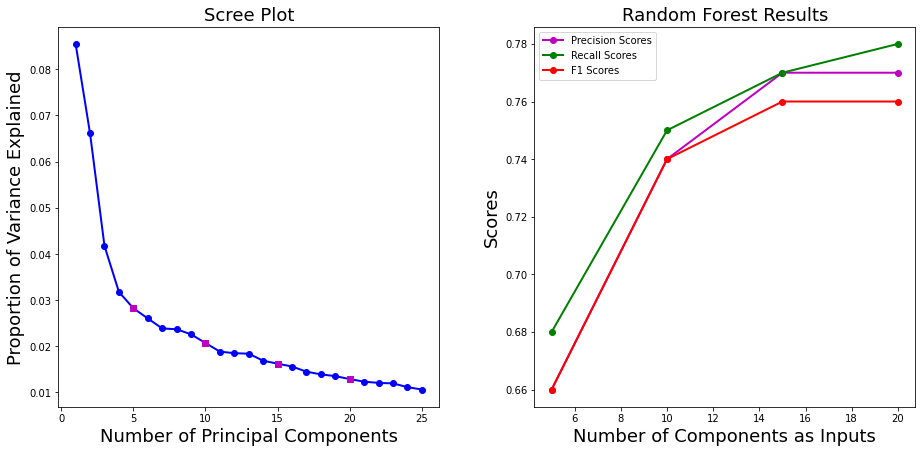

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(14,6))

fig.subplots_adjust(wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95)

PC_values = np.arange(25) + 1

ax1.plot(PC_values, pca_test.explained_variance_ratio_, 'bo-', linewidth=2)

x0 = [5, 10, 15, 20]
y0 = [pca_test.explained_variance_ratio_[4], pca_test.explained_variance_ratio_[9], \
     pca_test.explained_variance_ratio_[14], pca_test.explained_variance_ratio_[19]]
ax1.plot(x0, y0, 'ms')

ax1.set_title('Scree Plot', fontsize=18)
ax1.set_xlabel('Number of Principal Components', fontsize=18)
ax1.set_ylabel('Proportion of Variance Explained', fontsize=18)

x = [5, 10, 15, 20]
y = [0.68, 0.75, 0.77, 0.78]
y1 = [0.66, 0.74, 0.77, 0.77]
y2 = [0.68, 0.75, 0.77, 0.78]
y3 = [0.66, 0.74, 0.76, 0.76]

#ax2.plot(x, y, 'bo-', linewidth=2, label='Accuracy Scores')
ax2.plot(x, y1, 'mo-', linewidth=2, label='Precision Scores')
ax2.plot(x, y2, 'go-', linewidth=2, label='Recall Scores')
ax2.plot(x, y3, 'ro-', linewidth=2, label='F1 Scores')
ax2.set_xlabel('Number of Components as Inputs', fontsize=18)
ax2.set_ylabel('Scores', fontsize=18)
ax2.set_title('Random Forest Results', fontsize=18)
ax2.legend()

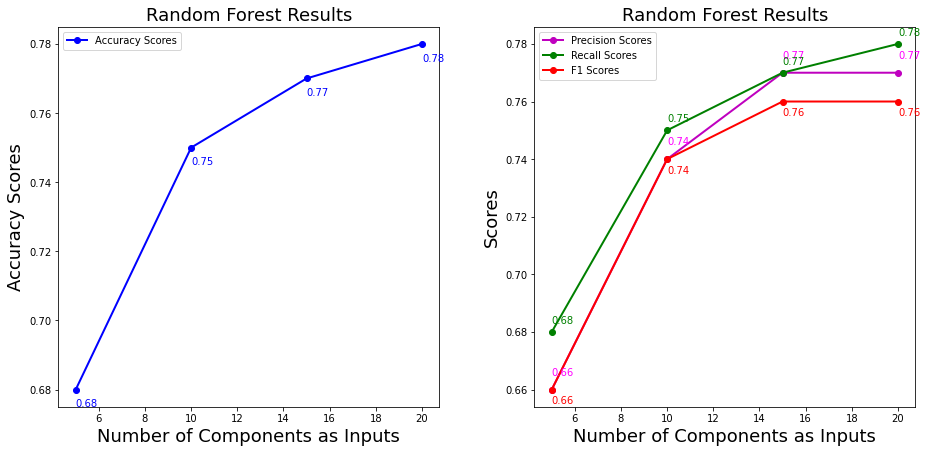

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(14,6))

fig.subplots_adjust(wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95)

PC_values = np.arange(25) + 1

#ax1.plot(PC_values, pca_test.explained_variance_ratio_, 'bo-', linewidth=2)

x0 = [5, 10, 15, 20]
y0 = [pca_test.explained_variance_ratio_[4], pca_test.explained_variance_ratio_[9], \
     pca_test.explained_variance_ratio_[14], pca_test.explained_variance_ratio_[19]]
ax1.plot(x, y, 'bo-', linewidth=2, label='Accuracy Scores')
for i,j in zip(x,y):
    ax1.annotate(str(j),xy=(i,j-0.005), color = 'blue')

ax1.set_title('Random Forest Results', fontsize=18)
ax1.set_xlabel('Number of Components as Inputs', fontsize=18)
ax1.set_ylabel('Accuracy Scores', fontsize=18)

ax1.legend()

x = [5, 10, 15, 20]
y = [0.68, 0.75, 0.77, 0.78]
y1 = [0.66, 0.74, 0.77, 0.77]
y2 = [0.68, 0.75, 0.77, 0.78]
y3 = [0.66, 0.74, 0.76, 0.76]

#ax2.plot(x, y, 'bo-', linewidth=2, label='Accuracy Scores')
ax2.plot(x, y1, 'mo-', linewidth=2, label='Precision Scores')
for i,j in zip(x,y1):
    ax2.annotate(str(j),xy=(i,j+0.005), color = 'magenta')
ax2.plot(x, y2, 'go-', linewidth=2, label='Recall Scores')
for i,j in zip(x,y2):
    ax2.annotate(str(j),xy=(i,j+0.003), color = 'green')
ax2.plot(x, y3, 'ro-', linewidth=2, label='F1 Scores')
for i,j in zip(x,y3):
    ax2.annotate(str(j),xy=(i,j-0.005), color = 'red')
ax2.set_xlabel('Number of Components as Inputs', fontsize=18)
ax2.set_ylabel('Scores', fontsize=18)
ax2.set_title('Random Forest Results', fontsize=18)
ax2.legend()

Text(0.5, 1.0, 'F1 Scores')

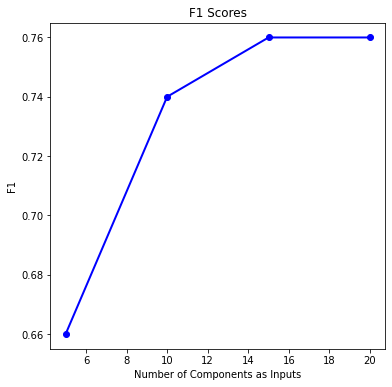

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(6,6))

x = [5, 10, 15, 20]
y = [0.66, 0.74, 0.76, 0.76]

ax.plot(x, y, 'bo-', linewidth=2)
ax.set_xlabel('Number of Components as Inputs')
ax.set_ylabel('F1')
ax.set_title('F1 Scores')

Text(0.5, 1.0, 'Recall Scores')

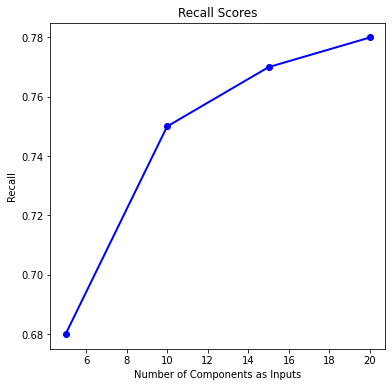

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(6,6))

x = [5, 10, 15, 20]
y = [0.68, 0.75, 0.77, 0.78]

ax.plot(x, y, 'bo-', linewidth=2)
ax.set_xlabel('Number of Components as Inputs')
ax.set_ylabel('Recall')
ax.set_title('Recall Scores')

Text(0.5, 1.0, 'Precision Scores')

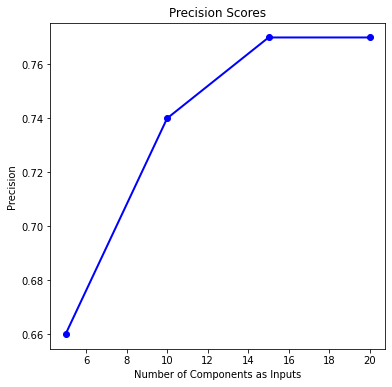

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(6,6))

x = [5, 10, 15, 20]
y = [0.66, 0.74, 0.77, 0.77]

ax.plot(x, y, 'bo-', linewidth=2)
ax.set_xlabel('Number of Components as Inputs')
ax.set_ylabel('Precision')
ax.set_title('Precision Scores')

Text(0.5, 1.0, 'Cross Entropy Scores')

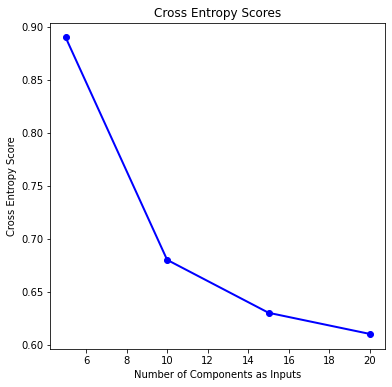

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(6,6))

x = [5, 10, 15, 20]
y = [0.89, 0.68, 0.63, 0.61]

ax.plot(x, y, 'bo-', linewidth=2)
ax.set_xlabel('Number of Components as Inputs')
ax.set_ylabel('Cross Entropy Score')
ax.set_title('Cross Entropy Scores')

## XGbooster 

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [ ]:
model = XGBClassifier(objective='multi:softmax')
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
accuracy_score(y_test, model.predict(X_test), normalize=True)

0.7689075630252101

In [ ]:
log_loss(y_test, model.predict_proba(X_test))

0.6625802810872473

Text(0, 0.5, 'Counts')

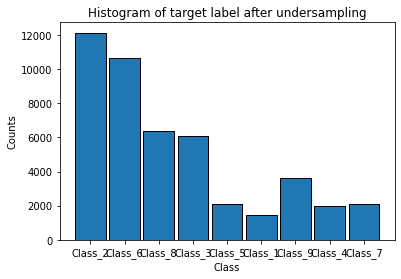

In [ ]:
plt.hist(y_train, rwidth = 0.9, edgecolor = 'black', bins = np.arange(0, 10) - 0.5)

plt.title('Histogram of target label after undersampling')
plt.xlabel("Class")
plt.ylabel("Counts")

## Undersampling 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state = 0)
X_undsamp, y_undsamp = undersample.fit_resample(X, Y)

Text(0, 0.5, 'Counts')

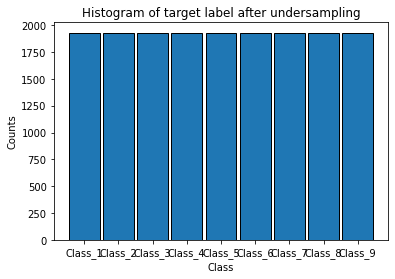

In [ ]:
plt.hist(y_undsamp, rwidth = 0.9, edgecolor = 'black', bins = np.arange(0, 10) - 0.5)

plt.title('Histogram of target label after undersampling')
plt.xlabel("Class")
plt.ylabel("Counts")

In [ ]:
X_undsamp_train, X_undsamp_test, y_undsamp_train, y_undsamp_test = train_test_split(X_undsamp, y_undsamp, stratify = None, random_state = 0)

In [ ]:
model_under = XGBClassifier()
model_under.fit(X_undsamp_train, y_undsamp_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
X, Yaccuracy_score(y_undsamp_test, model_under.predict(X_undsamp_test), normalize=True)

0.7486754204100438

In [ ]:
log_loss(y_undsamp_test, model_under.predict_proba(X_undsamp_test))

0.7328940169539057

# Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state = 444)
X_ovrsamp, y_ovrsamp = oversample.fit_resample(X, Y)

Text(0, 0.5, 'Counts')

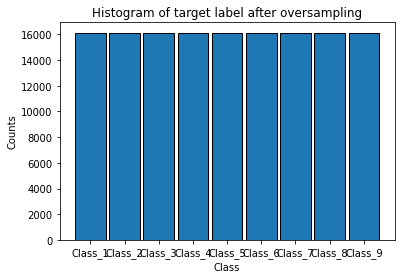

In [ ]:
plt.hist(y_ovrsamp, rwidth = 0.9, edgecolor = 'black', bins = np.arange(0, 10) - 0.5)

plt.title('Histogram of target label after oversampling')
plt.xlabel("Class")
plt.ylabel("Counts")

In [ ]:
X_ovrsamp_train, X_ovrsamp_test, y_ovrsamp_train, y_ovrsamp_test = train_test_split(X_ovrsamp, y_ovrsamp, stratify = None, random_state = 0)

In [ ]:
model_over = XGBClassifier(objective='multi:softmax')
model_over.fit(X_ovrsamp_train, y_ovrsamp_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
accuracy_score(y_test, model_over.predict(X_test), normalize=True)

0.7361344537815127

In [ ]:
accuracy_score(y_ovrsamp_test, model_over.predict(X_ovrsamp_test), normalize=True)

0.7571605789110958

In [ ]:
log_loss(y_ovrsamp_test, model_over.predict_proba(X_ovrsamp_test))

0.7175033198903571